# Travail Final (traitement automatique de corpus)


# Thème : l'évolution des droits de la femme en Belgique
### Critères de recherche :
### -Journal : le soir, la libre Belgique
### -Années :  de 1860 à 1990
### -Mois : Tout.
### -jours du mois : Tout.
### -Edition : pas d'édition spécifique
### -Langue : Francais
### -equation de recherche : ("droits des femmes" OR "égalité des sexes" OR "féminisme") AND "Belgique" 

# ETAPE 1: Exploration du corpus

## Imports

In [26]:
import pandas as pd
import collections
from collections import defaultdict
from collections import Counter
import os
import re
from nltk.corpus import stopwords
from pprint import pprint
import matplotlib.pyplot as plt
from collections import defaultdict
import spacy
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import yake
import numpy as np
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from scipy.spatial.distance import cosine
import nltk
nltk.download('stopwords')
french_stopwords = set(stopwords.words('french'))
nltk.download('punkt')

from nltk.tokenize import word_tokenize
import string


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/elfabnyl/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/elfabnyl/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Compter le nombre de documents dans le corpus

In [2]:
path = "../data/txt2/"
files = sorted(os.listdir(path))
len(files)

1000

## Explorer les noms de fichier

de manière générale dans mon corpus, les fichiers .txt on la structure suivante: KB_JB427_1939-09-11_01-00005.txt. 
donc je vais explorer ca afin de recueillir quelques statistiques généraux.

In [3]:
chaine = 'KB_JB838_1961-09-19_01-00002.txt'
type(chaine)

str

In [4]:
# la méthode split
chaine_split = chaine.split('_')
chaine_split

['KB', 'JB838', '1961-09-19', '01-00002.txt']

In [5]:
# Accéder à la date
date = chaine_split[2]
print(date)
# Accéder à l'année
date_split = date.split('-')
year = date_split[0]
print(year)

1961-09-19
1961


## Quelques statistiques

In [6]:
all_years = [str(year) for year in range(1860, 1990)]
print(all_years)

['1860', '1861', '1862', '1863', '1864', '1865', '1866', '1867', '1868', '1869', '1870', '1871', '1872', '1873', '1874', '1875', '1876', '1877', '1878', '1879', '1880', '1881', '1882', '1883', '1884', '1885', '1886', '1887', '1888', '1889', '1890', '1891', '1892', '1893', '1894', '1895', '1896', '1897', '1898', '1899', '1900', '1901', '1902', '1903', '1904', '1905', '1906', '1907', '1908', '1909', '1910', '1911', '1912', '1913', '1914', '1915', '1916', '1917', '1918', '1919', '1920', '1921', '1922', '1923', '1924', '1925', '1926', '1927', '1928', '1929', '1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939', '1940', '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',

In [7]:
#conversion d'une année en décénie
year[:3]
year[-1]
year[:3] + '0s'


'1960s'

In [8]:
count_decade = defaultdict(int)
count_month = defaultdict(int)
count_newspapers = defaultdict(int)
covered_years = set()

year
for f in files:
    if "_" in f and f.endswith("txt"):
        elems = f.split("_")
        
        newspaper = elems[1]
        year = elems[2].split("-")[0]
        covered_years.add(year)
        decade = year[:3] + "0s"
        
        month = int(elems[2].split("-")[1])
        
        count_decade[decade] += 1
        count_newspapers[newspaper] += 1
        count_month[month] += 1
    else:
        print(f"Anomalous file: {f}")

Anomalous file: .DS_Store


In [9]:
print(f"Il y a {count_newspapers['JB838']} exemplaires du journal Le Soir et {count_newspapers['JB427']} exemplaires de La Libre Belgique")

Il y a 180 exemplaires du journal Le Soir et 298 exemplaires de La Libre Belgique


In [10]:
print(f"Il y a {count_decade['1960s']} fichiers pour la décennie 1960s")

Il y a 7 fichiers pour la décennie 1960s


In [11]:
missing_years = [y for y in all_years if y not in covered_years]
print(f"Années manquantes: {', '.join(missing_years)}")

Années manquantes: 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1915, 1941, 1942, 1944, 1953, 1956, 1957, 1958, 1960, 1961, 1962, 1965, 1968, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989


## Visualisation du nombre de journaux par mois

Ces visualisations sont obtenues avec la librairie Matplotlib.


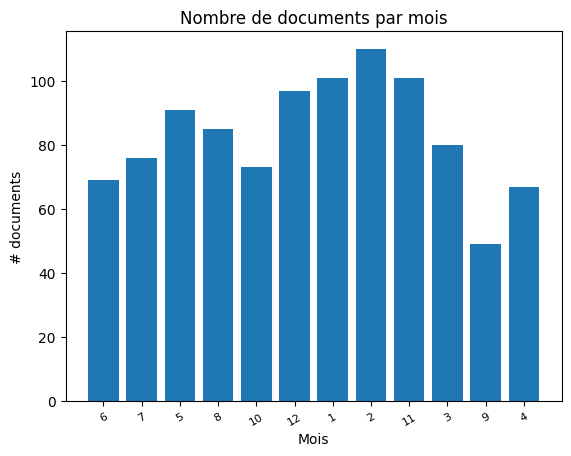

In [12]:
index = np.arange(len(count_month))
plt.bar(index, count_month.values())
plt.xlabel('Mois')
plt.ylabel('# documents')
plt.xticks(index, count_month.keys(), fontsize=8, rotation=30)
plt.title('Nombre de documents par mois')
plt.show()

# Extraction de keywords + Analyse de la distribution du vocabulaire

## Charger les fichiers du corpus

In [13]:
corpus = []
for filename in os.listdir(path):
    if filename.endswith(".txt"):
        with open(os.path.join(path, filename), "r", encoding="utf-8") as file:
            corpus.append(file.read())

print(f"{len(corpus)} fichiers chargés.")

999 fichiers chargés.


In [14]:
nltk_stopwords = set(stopwords.words('french'))

# Tokenisation et prétraitement

In [15]:
tokens = []
for text in corpus:
    tokens.extend([
        word.lower() for word in word_tokenize(text)
        if word not in string.punctuation  
    ])

print(f"Nombre total de tokens : {len(tokens)}")


Nombre total de tokens : 5892584


# Compter les fréquences globales

In [16]:

word_counts = Counter(tokens)
print("Top 40 des mots les plus fréquents :", word_counts.most_common(40))

Top 40 des mots les plus fréquents : [('de', 264977), ('la', 162529), ('le', 115246), ('et', 111854), ('à', 97906), ('les', 96615), ('des', 76668), ('a', 63665), ('du', 59282), ('en', 56230), ('’', 55846), ('»', 51183), ('que', 50997), ('un', 44527), ('—', 42047), ('qui', 40909), ('«', 39745), ('une', 37323), ('dans', 36228), ('pour', 34473), ('au', 33356), ('il', 33080), ('par', 31832), ('est', 31619), ('m.', 27645), ('l', 25238), ('pas', 24764), ('ne', 24185), ('se', 23649), ('ce', 21706), ('on', 19968), ('d', 19776), ('plus', 19703), ('sur', 18848), ('nous', 17952), ('i', 16369), ('son', 16010), ('aux', 15448), ('1', 14421), ('avec', 13881)]


# Créez des stop words en fonction de leur fréquence ou de leur distribution.



In [20]:

stop_words_frequency = [(word, count) for word, count in word_counts.most_common(50)]
print("Stop words fréquents :", stop_words_frequency)

Stop words fréquents : [('de', 264977), ('la', 162529), ('le', 115246), ('et', 111854), ('à', 97906), ('les', 96615), ('des', 76668), ('a', 63665), ('du', 59282), ('en', 56230), ('’', 55846), ('»', 51183), ('que', 50997), ('un', 44527), ('—', 42047), ('qui', 40909), ('«', 39745), ('une', 37323), ('dans', 36228), ('pour', 34473), ('au', 33356), ('il', 33080), ('par', 31832), ('est', 31619), ('m.', 27645), ('l', 25238), ('pas', 24764), ('ne', 24185), ('se', 23649), ('ce', 21706), ('on', 19968), ('d', 19776), ('plus', 19703), ('sur', 18848), ('nous', 17952), ('i', 16369), ('son', 16010), ('aux', 15448), ('1', 14421), ('avec', 13881), ('sont', 13681), ('n', 13220), ('mais', 13177), ('ont', 12657), ('y', 12489), ('cette', 12473), ('été', 12065), ('...', 11397), ('s', 11277), ("''", 10757)]


In [21]:


# Fréquence par document
word_in_documents = defaultdict(int)
for text in corpus:
    unique_words = set(word_tokenize(text.lower()))
    for word in unique_words:
        word_in_documents[word] += 1

# Stop words présents dans plus de 95% des documents
threshold = 0.95 * len(corpus)
stop_words_distribution = [word for word, count in word_in_documents.items() if count > threshold]
print("Stop words basés sur la distribution :", stop_words_distribution)


Stop words basés sur la distribution : ['si', "'", 'on', 'notre', 'leurs', 'deux', 'les', '?', 'sa', 'cette', 'comme', 'bruxelles', 'ces', 'm', 'se', '<', ')', 'u', 'lui', 'pour', 'mais', 'ont', 'de', 'tous', 's', 'être', '-', 'la', '•', 'nous', '»', 'leur', 'après', 'd', 'et', 'il', 'ou', 't', 'un', 'pas', 'toute', '■', '...', 'y', '*', 'que', '—', 'par', '>', 'm.', 'n', "''", 'ses', 'bien', 'le', 'sur', 'avec', ';', 'fait', 'aux', ',', 'a', 'féminisme', 'toutes', 'sont', 'tout', 'ce', 'qui', 'contre', 'aussi', '.', 'e', '(', 'elle', 'au', 'été', 'belgique', 'ne', '1', ':', 'même', 'des', '!', 'i', 'faire', '``', 'plus', 'très', 'sans', 'où', 'son', 'est', 'une', 'à', 'encore', '«', 'l', 'dont', 'dans', 'en', 'du']


# Nettoyer le corpus
### -combiner les deux listes de stop words
### -Nettoyer les tokens

In [22]:

stop_words = set(stop_words_frequency + stop_words_distribution + list(nltk_stopwords))


# Enrichissement manuel de la liste des stopwords

In [23]:
stop_words.update(["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
 "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", 
 "sous", "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", 
 "cela", "non", "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", 
 "depuis", "autres", "van", "het", "autre", "jusqu", "ville", "rossel", "dem",
 "un", "une", "le", "la", "et", "ou", "mais", "que", "si", "je", "tu", "il", "elle",
 "on", "nous", "vous", "ils", "elles", "ce", "ça", "y", "en", "a", "de", "pour",
 "par", "avec", "dans", "sur", "à", "du", "des", "au", "aux", "son", "sa", "ses",
 "leur", "leurs", "mon", "ma", "mes", "notre", "nos", "votre", "vos", "très",
 "trop", "assez", "beaucoup", "quelque", "certain", "chaque", "tel", "même",
 "pas", "ne", "ni", "car", "lorsque", "puisque", "comme", "quand", "où",
 "comment", "pourquoi", "donc", "alors", "ainsi", "cependant", "parce que","par ailleur", "d'un", "d'une", "c'est"])
print(stop_words)

{'bien', ('est', 31619), 'aie', ('ce', 21706), 'des', 'êtes', 'étés', 'étions', ('été', 12065), 'étant', 'eusse', '!', ('son', 16010), 'donc', ('sur', 18848), 'aurons', 'parce que', 'aura', 'soyons', 'ta', 'après', ('cette', 12473), 'eues', 'i', 'vous', 'si', 'le', 'faire', '``', 'certain', 'aient', 'mes', 'aurait', 'serait', ('aux', 15448), 'par ailleur', ('nous', 17952), "'", 'aies', 'd', ('i', 16369), ('le', 115246), 'ville', ('d', 19776), 'je', 'sera', 'on', 'sur', 'cela', 'et', 'notre', ('de', 264977), 'étée', 'j', 'jusqu', 'comment', ('on', 19968), 'leurs', 'deux', 'mon', 'avoir', 'fussions', ("''", 10757), 'étantes', 'quelque', 'sois', 'alors', 'avais', 'fut', 'eusses', 'avec', 'il', 'les', 'eut', 'avions', ';', 'serez', 'as', 'cet', 'fait', 'aux', ('s', 11277), 'eussent', '?', 'fûtes', 'qu', "d'une", 'eussiez', ('1', 14421), ('plus', 19703), 'auront', 'van', 'ou', ('qui', 40909), 'sa', 'ayons', ',', 't', 'faut', 'avons', 'moins', 'étante', 'serais', 'un', 'serons', ('’', 55846)

In [24]:

cleaned_tokens = [word for word in tokens if word not in stop_words]
print(f"Nombre de tokens après nettoyage : {len(cleaned_tokens)}")

Nombre de tokens après nettoyage : 3304415


In [28]:

cleaned_corpus = []

for doc in corpus:
   
    tokens = re.findall(r'\b\w+\b', doc.lower())  
    
    cleaned_tokens = [word for word in tokens if word not in stop_words]

    cleaned_corpus.append(" ".join(cleaned_tokens))


corpus = cleaned_corpus
print(f"Nombre de documents dans le corpus nettoyé : {len(cleaned_corpus)}")

Nombre de documents dans le corpus nettoyé : 999


In [30]:
print(f"{len(corpus)} fichiers chargés.")

# je configure Yake, ensuite dans une boucle j'extrait les mots clés pour chaque document.
yake_extractor = yake.KeywordExtractor(
    lan="fr",  
    n=1,       
    dedupLim=0.9, 
    top=10,    
    features=None 
)

for i, text in enumerate(corpus):
    print(f"\nFichier {i+1}:")
    keywords = yake_extractor.extract_keywords(text)
    for kw, score in keywords:
        print(f"{kw} (score: {score:.4f})")

999 fichiers chargés.

Fichier 1:
congrès (score: 0.0060)
ministre (score: 0.0061)
france (score: 0.0080)
politique (score: 0.0082)
angleterre (score: 0.0083)
femmes (score: 0.0086)
eglise (score: 0.0086)
ordre (score: 0.0091)
and (score: 0.0096)
vis (score: 0.0103)

Fichier 2:
mme (score: 0.0014)
dalba (score: 0.0014)
homme (score: 0.0018)
science (score: 0.0025)
temps (score: 0.0031)
madame (score: 0.0032)
point (score: 0.0043)
tue (score: 0.0047)
voir (score: 0.0050)
autriche (score: 0.0052)

Fichier 3:
droit (score: 0.0057)
réparation (score: 0.0062)
vis (score: 0.0064)
ouvrier (score: 0.0073)
petite (score: 0.0085)
ministre (score: 0.0089)
matin (score: 0.0090)
patron (score: 0.0092)
accidents (score: 0.0096)
cabinet (score: 0.0104)

Fichier 4:
mars (score: 0.0012)
chambre (score: 0.0044)
loi (score: 0.0045)
vendredi (score: 0.0046)
conseil (score: 0.0047)
président (score: 0.0049)
politique (score: 0.0049)
hodza (score: 0.0051)
ministre (score: 0.0054)
paris (score: 0.0057)

Fich

# faire un nuage de mots

In [31]:
# Extraire les mots-clés pour tout le corpus (pas le score)
keywords = []
for text in corpus:
    extracted_keywords = yake_extractor.extract_keywords(text)
    keywords.extend([kw[0] for kw in extracted_keywords])  


In [32]:

combined_keywords = " ".join(keywords)

wordcloud = WordCloud(
    width=800, 
    height=400,
    background_color='white',
    colormap='viridis',  
    max_words=200        
).generate(combined_keywords)



## Filtrage  des keywords pour manuellement enlever les stopwords qui persistent
### je connais ces stopword apres avoir fait un print(combined_keywords)

In [38]:
custom_stopwords = {
    "c'est", "d'un", "d'une", "van", "une", "est", "que", "le", "la", "les",
    "de", "des", "à", "en", "et", "sur", "pour", "dans", "un", "par", "au",
    "aux", "ce", "ça", "son", "sa", "ses", "leur", "leurs", "qu'il", "l on", "C est", "qu il", "qu'elle", "qu elle", "plu", "n'est", "est qu", "qu'on", "d une",
    "parce", "dit", "M.", "H", "Roi", "M", "U", "S", "II","Lo", "u","Société des Nations","Ue", "ue", "oui", "page", "robe", "nom", "auto", "vu", "vue",
    "voir", "concours", "lundi", "mardi", "mercredi", "jeudi", "vendredi", "samedi", "école", "film", "maitre", "Mlle", "Mme", "fer", "mars", "decembre",
    ""
}






In [39]:

all_stopwords = french_stopwords.union(custom_stopwords)

keywords_list = combined_keywords.split()

filtered_keywords = [word for word in keywords_list if word.lower() not in all_stopwords]


In [40]:
cleaned_combined_keywords = " ".join(filtered_keywords)


In [41]:
wordcloud = WordCloud(
    width=800, 
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=200
).generate(cleaned_combined_keywords)

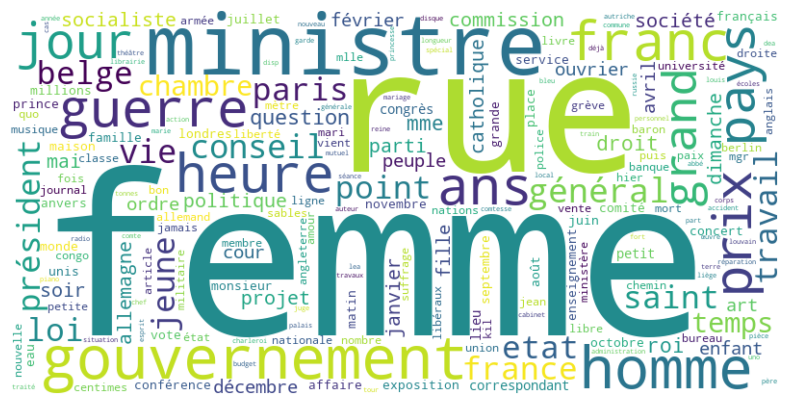

In [42]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  
plt.show()

# Trouver les entités nommés

In [383]:
nlp = spacy.load("fr_core_news_md")
all_entities = []


In [384]:
for text in corpus:
    doc = nlp(text)  
    entities = [ent.text for ent in doc.ents if ent.label_ in {"PER", "ORG", "GPE"}]
    all_entities.extend(entities) 


entity_counts = Counter(all_entities)



In [387]:
print(all_entities)

['journaui da pathiotti ssjnsvrui hs5rbes', 'rfadr anx bur postes tr jm sjays 88 86 ir trinestrè rdîl', 'ao bnxeao 12 ru hontagne', 'max bruxel', 'stockholm congr religieux genre nui points', 'louvain ioj dtt', 'jettn dabin', 'université louvain', 'paji wallon teht', 'ourd', 'ghse', 'eonpès', 'contrai émandpation ciyi économique bercés abord lespoir iv', 'rai', 'christ smi', 'lincieusemeat', 'stockholm méadent life and work', 'canterbury', 'sofia', 'lincoln', 'bénin', 'londres histoire maurras', 'saint thomas', 'profettre résultats riea', 'jielge', 'section française fense dej', 'allemand breslau', 'rené pacifiste', 'association life and work jmns', 'robert gardi ner mort', 'fsjth and ordre', 'dn hainaut liége', 'iii maurras', 'gouèver citoyenne', 'democra doyer', 'stei maurras', 'christ twort', 'jrarisïen oôàsterosoakt', 'nsnl stfnn str rfî politise émancipation', 'uniqne', 'attia mario simonatti', 'pr ia', 'publio', 'nt enant socialistes', 'thild serao salvator golta esl pratique com

# Analyse de sentiments


### selection de 7 phrases provenant de mon corpus. (Phrase prise sans aucune alteration)
### les journaux ou elles sont prise sont listés dans le rapport

In [43]:

phrases = [ "Nous savons fort bien que si l'on veut entendre les féministes, elles prétendent ne pas avoir du tout en vue'cette égalité des,, sexes.",
          "Quelle est j, naissance qui lutte, depuis vinf-jt siècles, jour faire admettre par la conscience hu Jasine et surtout par ta conscience du sexe j or t, 1' égalité des sexes devant la loi «orale ! [...] > C est incontestablement l'Eglise, «f la proclamation d'un tel principe, qui W's, tien île commun, qu'on le remarque, jvec une irréelle et paradoxale 1 égalité dis sexes j, fut pour le vrai féminisme un triomphe"
          "Ainsi, s’affirmera, paraît-il,, cêtfe égalité des sexes qui doit faire le bonheur de l’humanité en n.’y laissant . qu’ünê place mesurée à l’homme. #** En oe galant pays dé France où l’on s'obstine à croire que là femme ne gagnerait rien, et risquerait :de perdre tout, à galvauder ses dons naturels dans l’équivoque atmosphère des.réunions publiques, "
          "Le suffrage féminin, comme toute chose humaine, est un composé imparfait. [...] En résumé, libertaires ct individualistes ue sont nullement des spécialistes du féminisme"
          "le chanoine Coubé a dit : Le féminisme est le système qui cherche à faire triompher les droits de la femme et à lul faire octroyer la part à laquelle elle a droit dans la vie sociale. "
          "Et puis, elles auront, auprès de bien des-catholiques qui les liront, le même effet en vue duquel les a écrites le collaborateur du c Peuple » : ..elles leur ouvriront les yeux sur* l'importance du mouvement social féminin chrétien et les grands résultats qu'il a déjà obtenus."
          "Douze femmes, pire : douze fé' ministes, et des plus notoires du féminisme International — las! comme tout passe les frontières en dépit des barrières — occupaient, lundi soir, la tribune d'une salle d'ixelles."
          ]

In [44]:
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

In [45]:
# Analyser les phrases et résumer les résultats
results = []

for phrase in phrases:
    blob = tb(phrase)
    polarity, subjectivity = blob.sentiment
    polarity_perc = f"{100*abs(polarity):.0f}"
    subjectivity_perc = f"{100*subjectivity:.0f}"
    
    if polarity > 0:
        polarity_str = f"{polarity_perc}% positive"
    elif polarity < 0:
        polarity_str = f"{polarity_perc}% negative"
    else:
        polarity_str = "neutral"
    
    if subjectivity > 0:
        subjectivity_str = f"{subjectivity}% subjective"
    else:
        subjectivity_str = "perfectly objective"
    
    results.append((phrase, polarity_str, subjectivity_str))

In [46]:
# Résumé des résultats dans un tableau
df_results = pd.DataFrame(results, columns=["Phrase", "Polarité", "Subjectivité"])
print(df_results)

                                              Phrase      Polarité  \
0  Nous savons fort bien que si l'on veut entendr...  18% positive   
1  Quelle est j, naissance qui lutte, depuis vinf...   9% positive   

                      Subjectivité  
0  0.30000000000000004% subjective  
1  0.13703703703703707% subjective  


# Clustering des documents 

In [47]:
files = [f for f in sorted(os.listdir(path)) if f.endswith(".txt")]
texts = [open(path + f, "r", encoding="utf-8").read() for f in files]

In [48]:
texts = [open(path + f, "r", encoding="utf-8").read() for f in files]

## Vectoriser les documents à l'aide de TF-IDF

In [49]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

### Instancier le modèle TF-IDF avec ses arguments

In [50]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

### Construire la matrice de vecteurs à l'aide de la fonction `fit_transform`

In [51]:
tfidf_vectors = vectorizer.fit_transform(texts)

/Users/elfabnyl/Documents/STIC/tac_venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [52]:
# Détail de la matrice
tfidf_vectors

<999x3635 sparse matrix of type '<class 'numpy.float64'>'
	with 741016 stored elements in Compressed Sparse Row format>

### Imprimer le vecteur tf-IDF du premier document

In [53]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

juin        0.230535
local       0.192435
jeux        0.183030
qu'elles    0.173228
franco      0.169447
              ...   
-■          0.000000
.-          0.000000
îles        0.000000
.....       0.000000
.1          0.000000
Length: 3635, dtype: float64

In [54]:
cosine([1, 2, 3], [1, 2, 3])

np.float64(0.0)

## Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents
### Définir un nombre de clusters


In [55]:
N_CLUSTERS = 5

### Instancier le modèle K-Means et ses arguments

In [56]:
km_model = KMeans(n_clusters=N_CLUSTERS)

### Appliquer le clustering à l'aide de la fonction `fit_predict`

In [57]:
clusters = km_model.fit_predict(tfidf_vectors)

In [58]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [59]:
pprint(dict(clustering))

{np.int32(0): ['KB_JB1051_1927-05-22_01-00004.txt',
               'KB_JB1051_1927-10-12_01-00004.txt',
               'KB_JB1051_1927-12-04_01-00004.txt',
               'KB_JB1051_1927-12-11_01-00004.txt',
               'KB_JB1051_1928-02-29_01-00004.txt',
               'KB_JB1051_1937-11-21_01-00005.txt',
               'KB_JB421_1902-11-30_01-00005.txt',
               'KB_JB421_1902-12-15_01-00002.txt',
               'KB_JB421_1903-11-30_01-00001.txt',
               'KB_JB421_1903-12-04_01-00002.txt',
               'KB_JB421_1905-08-28_01-00001.txt',
               'KB_JB421_1906-02-08_01-00002.txt',
               'KB_JB421_1907-05-01_01-00002.txt',
               'KB_JB421_1907-07-28_01-00002.txt',
               'KB_JB421_1907-11-18_01-00003.txt',
               'KB_JB421_1909-07-23_01-00003.txt',
               'KB_JB421_1909-08-21_01-00002.txt',
               'KB_JB421_1910-09-04_01-00001.txt',
               'KB_JB421_1929-05-19_01-00003.txt',
               'KB_JB421_

## Visualiser les clusters

In [60]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [61]:
reduced_vectors[:10]

array([[-0.21386306,  0.08405824],
       [-0.20398015,  0.17378788],
       [-0.19773254,  0.2071432 ],
       [-0.21285496,  0.20539386],
       [-0.19247722,  0.15503651],
       [-0.17337502,  0.43930381],
       [-0.18675914,  0.10689702],
       [-0.19350287,  0.18483303],
       [-0.19283941,  0.12352085],
       [-0.19541674,  0.22465909]])

## Générer le plot

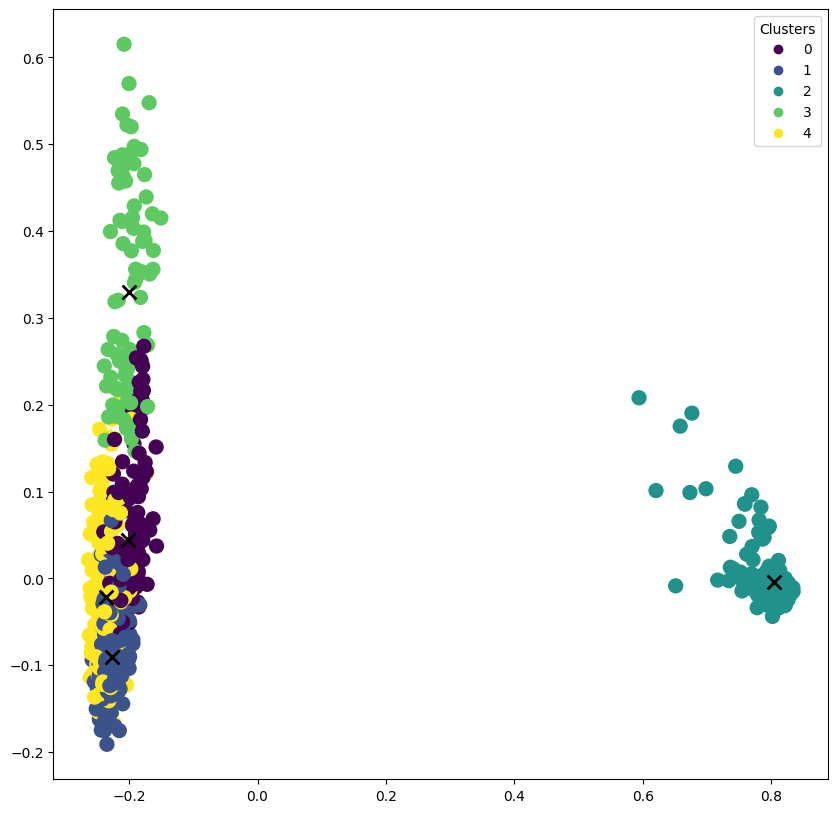

In [62]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")